In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
df=pd.read_csv("NFLX.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [5]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


In [6]:
df.shape

(1009, 7)

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
x=df[["Open","High","Low","Volume"]]
y=df[["Close"]]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=55)

In [14]:
model=Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [15]:
model.fit(x_train,y_train, validation_data=(x_test, y_test),batch_size=128,epochs=1050)
model.summary()

Epoch 1/1050
7/7 [==============================] - 4s 158ms/step - loss: 189392.8906 - val_loss: 176299.5625
Epoch 2/1050
7/7 [==============================] - 0s 22ms/step - loss: 187532.9062 - val_loss: 174242.5000
Epoch 3/1050
7/7 [==============================] - 0s 19ms/step - loss: 185058.7812 - val_loss: 171279.2812
Epoch 4/1050
7/7 [==============================] - 0s 19ms/step - loss: 181677.7969 - val_loss: 167531.2031
Epoch 5/1050
7/7 [==============================] - 0s 18ms/step - loss: 177542.1875 - val_loss: 163127.9844
Epoch 6/1050
7/7 [==============================] - 0s 17ms/step - loss: 172911.4844 - val_loss: 158690.3750
Epoch 7/1050
7/7 [==============================] - 0s 18ms/step - loss: 168415.1406 - val_loss: 154429.5781
Epoch 8/1050
7/7 [==============================] - 0s 17ms/step - loss: 164019.1562 - val_loss: 150210.5781
Epoch 9/1050
7/7 [==============================] - 0s 16ms/step - loss: 159634.9375 - val_loss: 145945.7031
Epoch 10/1050
7/7 

7/7 [==============================] - 0s 16ms/step - loss: 11961.5244 - val_loss: 10733.9707
Epoch 77/1050
7/7 [==============================] - 0s 15ms/step - loss: 11960.7920 - val_loss: 10742.0273
Epoch 78/1050
7/7 [==============================] - 0s 16ms/step - loss: 11959.2412 - val_loss: 10747.0693
Epoch 79/1050
7/7 [==============================] - 0s 15ms/step - loss: 11958.5469 - val_loss: 10752.9580
Epoch 80/1050
7/7 [==============================] - 0s 15ms/step - loss: 11957.9922 - val_loss: 10759.3662
Epoch 81/1050
7/7 [==============================] - 0s 15ms/step - loss: 11957.3428 - val_loss: 10762.5039
Epoch 82/1050
7/7 [==============================] - 0s 15ms/step - loss: 11957.3379 - val_loss: 10766.6855
Epoch 83/1050
7/7 [==============================] - 0s 16ms/step - loss: 11957.2412 - val_loss: 10769.8740
Epoch 84/1050
7/7 [==============================] - 0s 15ms/step - loss: 11956.9326 - val_loss: 10771.5498
Epoch 85/1050
7/7 [=======================

Epoch 152/1050
7/7 [==============================] - 0s 15ms/step - loss: 1073.4001 - val_loss: 714.1478
Epoch 153/1050
7/7 [==============================] - 0s 15ms/step - loss: 1024.5146 - val_loss: 694.7518
Epoch 154/1050
7/7 [==============================] - 0s 14ms/step - loss: 966.8085 - val_loss: 648.8840
Epoch 155/1050
7/7 [==============================] - 0s 15ms/step - loss: 919.2978 - val_loss: 607.4395
Epoch 156/1050
7/7 [==============================] - 0s 15ms/step - loss: 871.8637 - val_loss: 581.9069
Epoch 157/1050
7/7 [==============================] - 0s 15ms/step - loss: 836.1545 - val_loss: 547.9774
Epoch 158/1050
7/7 [==============================] - 0s 15ms/step - loss: 801.2341 - val_loss: 536.8046
Epoch 159/1050
7/7 [==============================] - 0s 15ms/step - loss: 765.1729 - val_loss: 493.8105
Epoch 160/1050
7/7 [==============================] - 0s 16ms/step - loss: 719.2590 - val_loss: 464.4814
Epoch 161/1050
7/7 [==============================] -

7/7 [==============================] - 0s 15ms/step - loss: 96.2341 - val_loss: 68.4921
Epoch 231/1050
7/7 [==============================] - 0s 15ms/step - loss: 92.9243 - val_loss: 66.9128
Epoch 232/1050
7/7 [==============================] - 0s 15ms/step - loss: 89.3892 - val_loss: 55.6538
Epoch 233/1050
7/7 [==============================] - 0s 15ms/step - loss: 90.3101 - val_loss: 59.5197
Epoch 234/1050
7/7 [==============================] - 0s 15ms/step - loss: 89.8740 - val_loss: 57.6133
Epoch 235/1050
7/7 [==============================] - 0s 15ms/step - loss: 85.7032 - val_loss: 52.8163
Epoch 236/1050
7/7 [==============================] - 0s 15ms/step - loss: 87.3606 - val_loss: 64.9021
Epoch 237/1050
7/7 [==============================] - 0s 15ms/step - loss: 92.4158 - val_loss: 53.0596
Epoch 238/1050
7/7 [==============================] - 0s 16ms/step - loss: 81.3462 - val_loss: 65.8171
Epoch 239/1050
7/7 [==============================] - 0s 15ms/step - loss: 92.5482 - val

7/7 [==============================] - 0s 15ms/step - loss: 56.9474 - val_loss: 42.6528
Epoch 310/1050
7/7 [==============================] - 0s 15ms/step - loss: 48.4328 - val_loss: 58.3879
Epoch 311/1050
7/7 [==============================] - 0s 15ms/step - loss: 59.0086 - val_loss: 45.6414
Epoch 312/1050
7/7 [==============================] - 0s 15ms/step - loss: 56.3241 - val_loss: 30.3447
Epoch 313/1050
7/7 [==============================] - 0s 15ms/step - loss: 43.1693 - val_loss: 41.7494
Epoch 314/1050
7/7 [==============================] - 0s 15ms/step - loss: 46.0152 - val_loss: 29.9715
Epoch 315/1050
7/7 [==============================] - 0s 15ms/step - loss: 40.3571 - val_loss: 30.7560
Epoch 316/1050
7/7 [==============================] - 0s 15ms/step - loss: 40.0931 - val_loss: 32.1229
Epoch 317/1050
7/7 [==============================] - 0s 15ms/step - loss: 43.9287 - val_loss: 28.8315
Epoch 318/1050
7/7 [==============================] - 0s 15ms/step - loss: 40.5327 - val

7/7 [==============================] - 0s 15ms/step - loss: 32.4988 - val_loss: 28.0235
Epoch 389/1050
7/7 [==============================] - 0s 15ms/step - loss: 34.5925 - val_loss: 24.9857
Epoch 390/1050
7/7 [==============================] - 0s 15ms/step - loss: 29.8967 - val_loss: 26.0940
Epoch 391/1050
7/7 [==============================] - 0s 15ms/step - loss: 30.9841 - val_loss: 36.2198
Epoch 392/1050
7/7 [==============================] - 0s 14ms/step - loss: 35.4223 - val_loss: 24.6210
Epoch 393/1050
7/7 [==============================] - 0s 15ms/step - loss: 37.1704 - val_loss: 35.8565
Epoch 394/1050
7/7 [==============================] - 0s 15ms/step - loss: 41.2252 - val_loss: 44.1195
Epoch 395/1050
7/7 [==============================] - 0s 14ms/step - loss: 33.7506 - val_loss: 40.6010
Epoch 396/1050
7/7 [==============================] - 0s 15ms/step - loss: 38.9497 - val_loss: 53.2254
Epoch 397/1050
7/7 [==============================] - 0s 16ms/step - loss: 39.6677 - val

7/7 [==============================] - 0s 15ms/step - loss: 36.6501 - val_loss: 42.2721
Epoch 468/1050
7/7 [==============================] - 0s 15ms/step - loss: 34.1191 - val_loss: 28.2607
Epoch 469/1050
7/7 [==============================] - 0s 15ms/step - loss: 27.4164 - val_loss: 24.7153
Epoch 470/1050
7/7 [==============================] - 0s 15ms/step - loss: 28.7515 - val_loss: 40.8950
Epoch 471/1050
7/7 [==============================] - 0s 15ms/step - loss: 34.6561 - val_loss: 26.5261
Epoch 472/1050
7/7 [==============================] - 0s 15ms/step - loss: 31.9656 - val_loss: 39.6156
Epoch 473/1050
7/7 [==============================] - 0s 15ms/step - loss: 36.1907 - val_loss: 46.3064
Epoch 474/1050
7/7 [==============================] - 0s 14ms/step - loss: 41.8890 - val_loss: 58.1193
Epoch 475/1050
7/7 [==============================] - 0s 15ms/step - loss: 39.4699 - val_loss: 36.4393
Epoch 476/1050
7/7 [==============================] - 0s 15ms/step - loss: 36.3965 - val

7/7 [==============================] - 0s 17ms/step - loss: 26.9629 - val_loss: 24.0145
Epoch 547/1050
7/7 [==============================] - 0s 14ms/step - loss: 27.7403 - val_loss: 25.2046
Epoch 548/1050
7/7 [==============================] - 0s 15ms/step - loss: 29.3569 - val_loss: 26.7908
Epoch 549/1050
7/7 [==============================] - 0s 15ms/step - loss: 27.4969 - val_loss: 24.7732
Epoch 550/1050
7/7 [==============================] - 0s 15ms/step - loss: 26.9593 - val_loss: 22.0951
Epoch 551/1050
7/7 [==============================] - 0s 15ms/step - loss: 25.6205 - val_loss: 27.3698
Epoch 552/1050
7/7 [==============================] - 0s 15ms/step - loss: 26.9858 - val_loss: 24.4859
Epoch 553/1050
7/7 [==============================] - 0s 14ms/step - loss: 26.9787 - val_loss: 23.5630
Epoch 554/1050
7/7 [==============================] - 0s 15ms/step - loss: 27.0803 - val_loss: 25.0053
Epoch 555/1050
7/7 [==============================] - 0s 15ms/step - loss: 27.7144 - val

7/7 [==============================] - 0s 16ms/step - loss: 47.7092 - val_loss: 38.5611
Epoch 626/1050
7/7 [==============================] - 0s 15ms/step - loss: 47.0150 - val_loss: 26.3818
Epoch 627/1050
7/7 [==============================] - 0s 15ms/step - loss: 34.7544 - val_loss: 25.4105
Epoch 628/1050
7/7 [==============================] - 0s 15ms/step - loss: 34.6760 - val_loss: 28.5045
Epoch 629/1050
7/7 [==============================] - 0s 15ms/step - loss: 33.9888 - val_loss: 21.5540
Epoch 630/1050
7/7 [==============================] - 0s 15ms/step - loss: 30.5136 - val_loss: 24.7441
Epoch 631/1050
7/7 [==============================] - 0s 15ms/step - loss: 30.8101 - val_loss: 28.9352
Epoch 632/1050
7/7 [==============================] - 0s 15ms/step - loss: 29.5075 - val_loss: 28.9968
Epoch 633/1050
7/7 [==============================] - 0s 15ms/step - loss: 26.6228 - val_loss: 23.8175
Epoch 634/1050
7/7 [==============================] - 0s 17ms/step - loss: 26.1865 - val

7/7 [==============================] - 0s 15ms/step - loss: 27.4626 - val_loss: 25.4268
Epoch 705/1050
7/7 [==============================] - 0s 15ms/step - loss: 30.3991 - val_loss: 31.7053
Epoch 706/1050
7/7 [==============================] - 0s 15ms/step - loss: 34.1833 - val_loss: 27.7865
Epoch 707/1050
7/7 [==============================] - 0s 15ms/step - loss: 34.1785 - val_loss: 27.5060
Epoch 708/1050
7/7 [==============================] - 0s 15ms/step - loss: 32.0464 - val_loss: 32.7383
Epoch 709/1050
7/7 [==============================] - 0s 15ms/step - loss: 35.3294 - val_loss: 34.7368
Epoch 710/1050
7/7 [==============================] - 0s 15ms/step - loss: 31.9938 - val_loss: 23.3390
Epoch 711/1050
7/7 [==============================] - 0s 15ms/step - loss: 28.4920 - val_loss: 46.3322
Epoch 712/1050
7/7 [==============================] - 0s 15ms/step - loss: 44.2141 - val_loss: 66.5750
Epoch 713/1050
7/7 [==============================] - 0s 15ms/step - loss: 44.2962 - val

7/7 [==============================] - 0s 17ms/step - loss: 30.3719 - val_loss: 25.2582
Epoch 784/1050
7/7 [==============================] - 0s 18ms/step - loss: 28.6209 - val_loss: 23.7905
Epoch 785/1050
7/7 [==============================] - 0s 17ms/step - loss: 25.7742 - val_loss: 22.3419
Epoch 786/1050
7/7 [==============================] - 0s 18ms/step - loss: 25.1305 - val_loss: 22.3336
Epoch 787/1050
7/7 [==============================] - 0s 16ms/step - loss: 26.7704 - val_loss: 29.9741
Epoch 788/1050
7/7 [==============================] - 0s 15ms/step - loss: 28.2351 - val_loss: 34.4776
Epoch 789/1050
7/7 [==============================] - 0s 16ms/step - loss: 41.1501 - val_loss: 47.5647
Epoch 790/1050
7/7 [==============================] - 0s 15ms/step - loss: 34.8315 - val_loss: 30.1785
Epoch 791/1050
7/7 [==============================] - 0s 15ms/step - loss: 28.4475 - val_loss: 23.7547
Epoch 792/1050
7/7 [==============================] - 0s 15ms/step - loss: 26.3257 - val

7/7 [==============================] - 0s 15ms/step - loss: 29.4970 - val_loss: 24.2805
Epoch 863/1050
7/7 [==============================] - 0s 14ms/step - loss: 28.5996 - val_loss: 25.7221
Epoch 864/1050
7/7 [==============================] - 0s 15ms/step - loss: 26.7462 - val_loss: 23.6598
Epoch 865/1050
7/7 [==============================] - 0s 15ms/step - loss: 27.0416 - val_loss: 24.6921
Epoch 866/1050
7/7 [==============================] - 0s 15ms/step - loss: 26.9048 - val_loss: 22.8123
Epoch 867/1050
7/7 [==============================] - 0s 15ms/step - loss: 26.6686 - val_loss: 21.9010
Epoch 868/1050
7/7 [==============================] - 0s 14ms/step - loss: 27.8907 - val_loss: 23.9965
Epoch 869/1050
7/7 [==============================] - 0s 15ms/step - loss: 29.5152 - val_loss: 29.4717
Epoch 870/1050
7/7 [==============================] - 0s 15ms/step - loss: 33.6213 - val_loss: 27.6259
Epoch 871/1050
7/7 [==============================] - 0s 15ms/step - loss: 35.9986 - val

7/7 [==============================] - 0s 15ms/step - loss: 26.9204 - val_loss: 45.3787
Epoch 942/1050
7/7 [==============================] - 0s 15ms/step - loss: 41.8597 - val_loss: 58.7273
Epoch 943/1050
7/7 [==============================] - 0s 15ms/step - loss: 42.1713 - val_loss: 32.5316
Epoch 944/1050
7/7 [==============================] - 0s 15ms/step - loss: 29.8236 - val_loss: 26.7646
Epoch 945/1050
7/7 [==============================] - 0s 15ms/step - loss: 31.2256 - val_loss: 33.0981
Epoch 946/1050
7/7 [==============================] - 0s 15ms/step - loss: 30.0728 - val_loss: 28.9781
Epoch 947/1050
7/7 [==============================] - 0s 15ms/step - loss: 28.5457 - val_loss: 32.7703
Epoch 948/1050
7/7 [==============================] - 0s 15ms/step - loss: 36.1108 - val_loss: 22.6902
Epoch 949/1050
7/7 [==============================] - 0s 15ms/step - loss: 26.5789 - val_loss: 24.4757
Epoch 950/1050
7/7 [==============================] - 0s 16ms/step - loss: 26.8428 - val

7/7 [==============================] - 0s 16ms/step - loss: 33.9135 - val_loss: 28.0225
Epoch 1021/1050
7/7 [==============================] - 0s 15ms/step - loss: 31.0452 - val_loss: 34.2804
Epoch 1022/1050
7/7 [==============================] - 0s 15ms/step - loss: 30.8780 - val_loss: 40.8691
Epoch 1023/1050
7/7 [==============================] - 0s 15ms/step - loss: 32.3905 - val_loss: 26.8562
Epoch 1024/1050
7/7 [==============================] - 0s 15ms/step - loss: 28.7653 - val_loss: 35.7108
Epoch 1025/1050
7/7 [==============================] - 0s 15ms/step - loss: 35.5946 - val_loss: 29.5096
Epoch 1026/1050
7/7 [==============================] - 0s 15ms/step - loss: 29.6353 - val_loss: 33.1399
Epoch 1027/1050
7/7 [==============================] - 0s 16ms/step - loss: 29.9793 - val_loss: 32.2635
Epoch 1028/1050
7/7 [==============================] - 0s 15ms/step - loss: 31.5711 - val_loss: 25.3678
Epoch 1029/1050
7/7 [==============================] - 0s 15ms/step - loss: 27.1

In [16]:
loss_df=pd.DataFrame(model.history.history)

<AxesSubplot:>

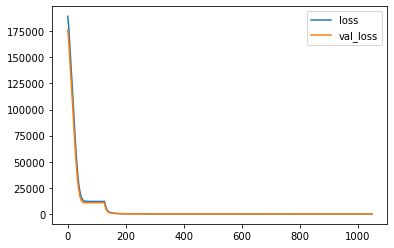

In [17]:
loss_df.plot()

In [18]:
tahmin=model.predict(x)

32/32 [==============================] - 1s 3ms/step


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
r2_score(tahmin,y)

0.9978890124184683

In [21]:
(mean_squared_error(tahmin,y))**0.5

4.9999978800825